In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#create a random distribution of numbers
#create a function for that!!!
def create_number(mu=54,sigma=15,num_samples=100,seed=42):
    np.random.seed(seed)
    #With the seed reset (every time), the same set of numbers will appear every time.
    sample_numbers=np.random.normal(loc=mu,scale=sigma,size=num_samples)
    #random sample from a normal(gaussian) distribution with
    sample_numbers=np.round(sample_numbers,decimals=0)
    return sample_numbers

In [4]:
samples=create_number()
samples

array([61., 52., 64., 77., 50., 50., 78., 66., 47., 62., 47., 47., 58.,
       25., 28., 46., 39., 59., 40., 33., 76., 51., 55., 33., 46., 56.,
       37., 60., 45., 50., 45., 82., 54., 38., 66., 36., 57., 25., 34.,
       57., 65., 57., 52., 49., 32., 43., 47., 70., 59., 28., 59., 48.,
       44., 63., 69., 68., 41., 49., 59., 69., 47., 51., 37., 36., 66.,
       74., 53., 69., 59., 44., 59., 77., 53., 77., 15., 66., 55., 50.,
       55., 24., 51., 59., 76., 46., 42., 46., 68., 59., 46., 62., 55.,
       69., 43., 49., 48., 32., 58., 58., 54., 50.])

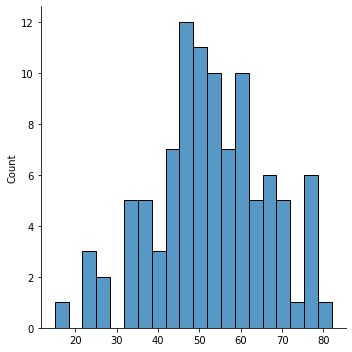

In [5]:
sns.displot(samples,bins=20)




C:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

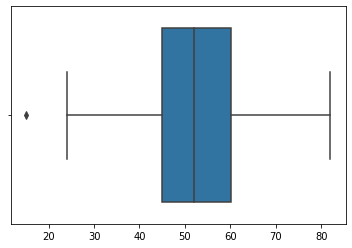

In [6]:
sns.boxplot(samples)#box plot (due to valid data points)

In [7]:
ser=pd.Series(samples)#trying to take samples as panda series
ser

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 100, dtype: float64

In [8]:
#to see Iqr
ser.describe()


count    100.000000
mean      52.410000
std       13.610079
min       15.000000
25%       45.000000
50%       52.000000
75%       60.250000
max       82.000000
dtype: float64

In [9]:
IQR=60.25-45.00
lower_limit=45.00-1.5*IQR
IQR

15.25

In [10]:
upper_limit = 60.25+1.5*IQR

In [11]:
lower_limit

22.125

In [12]:
upper_limit

83.125

In [13]:
#to drop outliers
ser[ser>lower_limit]

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 99, dtype: float64

In [14]:
#another method to find lower and upper limit
q75,q25=np.percentile(samples,[75,25])
IQR=q75-q25
IQR


15.25

In [15]:
IQR

15.25

In [16]:
lower_limit=q25-1.5*IQR

In [17]:
lower_limit

22.125

In [18]:
#now we take that data set and typo handel that data set into
with open (r'C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data\DataDictionary_AmesHousing.txt',"r") as f:
    print(f.read())

NAME: AmesHousing.txt
TYPE: Population
SIZE: 2930 observations, 82 variables
ARTICLE TITLE: Ames Iowa: Alternative to the Boston Housing Data Set

DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

SOURCES: 
Ames, Iowa Assessor’s Office 

VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

Order (Discrete): Observation number

PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. 

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
   

In [19]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data\ames.csv")
df.head()



,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [20]:
#check the corelation function
df.corr().head()

,Order,PID,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS.SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot.Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot.Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549


In [21]:
#correlation w.r.t salesPrice
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed.Porch    -0.128787
Kitchen.AbvGr     -0.119814
Overall.Cond      -0.101697
MS.SubClass       -0.085092
Low.Qual.Fin.SF   -0.037660
Bsmt.Half.Bath    -0.035835
Order             -0.031408
Yr.Sold           -0.030569
Misc.Val          -0.015691
BsmtFin.SF.2       0.005891
X3Ssn.Porch        0.032225
Mo.Sold            0.035259
Pool.Area          0.068403
Screen.Porch       0.112151
Bedroom.AbvGr      0.143913
Bsmt.Unf.SF        0.182855
Lot.Area           0.266549
X2nd.Flr.SF        0.269373
Bsmt.Full.Bath     0.276050
Half.Bath          0.285056
Open.Porch.SF      0.312951
Wood.Deck.SF       0.327143
Lot.Frontage       0.357318
BsmtFin.SF.1       0.432914
Fireplaces         0.474558
TotRms.AbvGrd      0.495474
Mas.Vnr.Area       0.508285
Garage.Yr.Blt      0.526965
Year.Remod.Add     0.532974
Full.Bath          0.545604
Year.Built         0.558426
X1st.Flr.SF        0.621676
Total.Bsmt.SF      0.632280
Garage.Area        0.640401
Garage.Cars        0

In [22]:
#find the highly correlated with sales price 

<AxesSubplot:xlabel='Overall.Qual', ylabel='SalePrice'>

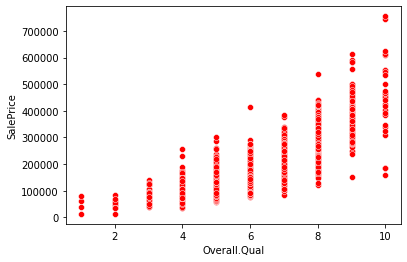

In [23]:
sns.scatterplot(x="Overall.Qual",y="SalePrice",data=df,color="red")

<AxesSubplot:xlabel='Gr.Liv.Area', ylabel='SalePrice'>

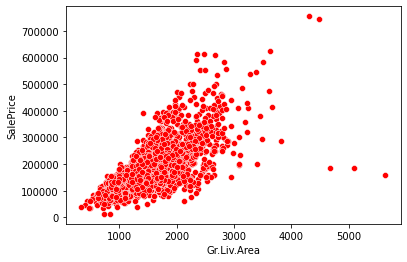

In [24]:
sns.scatterplot(x="Gr.Liv.Area",y="SalePrice",data=df,color="red")

In [25]:
#identfy outliers
#then removed outliers
df[(df["Overall.Qual"]>8)&(df["SalePrice"]<200000)]

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [26]:
df[(df["Gr.Liv.Area"]>4000)&(df["SalePrice"]<300000)]

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [27]:
drop_ind=df[(df["Gr.Liv.Area"]>4000)&(df["SalePrice"]<300000)].index

In [28]:
df=df.drop(drop_ind,axis=0)

<AxesSubplot:xlabel='Overall.Qual', ylabel='SalePrice'>

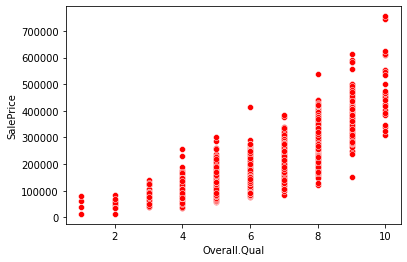

In [29]:
#outliers are removed
sns.scatterplot(x="Overall.Qual",y="SalePrice",data=df,color="red")

<AxesSubplot:xlabel='Gr.Liv.Area', ylabel='SalePrice'>

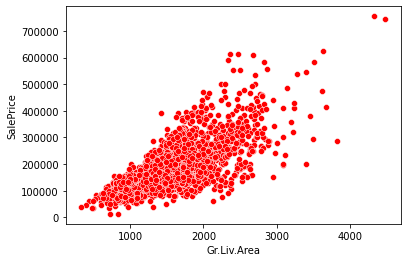

In [30]:
sns.scatterplot(x="Gr.Liv.Area",y="SalePrice",data=df,color="red")

In [31]:
#to save the model 
#df.to_csv('ames_no_outliers.csv')
df.to_csv(os.path.join(r'C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data','ames_no_outliers.csv'))


In [32]:
#now we are using data set without outliers 
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data\ames_no_outliers.csv")

In [33]:
df.head()

,Unnamed: 0,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [34]:
#to see the basic features ie. how many values are missing in the data set.


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2927 non-null   int64  
 1   Order            2927 non-null   int64  
 2   PID              2927 non-null   int64  
 3   MS.SubClass      2927 non-null   int64  
 4   MS.Zoning        2927 non-null   object 
 5   Lot.Frontage     2437 non-null   float64
 6   Lot.Area         2927 non-null   int64  
 7   Street           2927 non-null   object 
 8   Alley            198 non-null    object 
 9   Lot.Shape        2927 non-null   object 
 10  Land.Contour     2927 non-null   object 
 11  Utilities        2927 non-null   object 
 12  Lot.Config       2927 non-null   object 
 13  Land.Slope       2927 non-null   object 
 14  Neighborhood     2927 non-null   object 
 15  Condition.1      2927 non-null   object 
 16  Condition.2      2927 non-null   object 
 17  Bldg.Type     

In [38]:
df=df.drop(["Unnamed: 0","PID"],axis=1)

In [40]:
len(df.columns)

81

In [41]:
df.shape

(2927, 81)

In [42]:
df.head()


,Order,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [44]:
df.isnull()

,Order,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [45]:
df.isnull().sum()#number of null value

Order               0
MS.SubClass         0
MS.Zoning           0
Lot.Frontage      490
Lot.Area            0
                 ... 
Mo.Sold             0
Yr.Sold             0
Sale.Type           0
Sale.Condition      0
SalePrice           0
Length: 81, dtype: int64

In [46]:
len(df)

2927

In [47]:
(df.isnull().sum()/len(df))*100#percentage of null value

Order              0.00000
MS.SubClass        0.00000
MS.Zoning          0.00000
Lot.Frontage      16.74069
Lot.Area           0.00000
                    ...   
Mo.Sold            0.00000
Yr.Sold            0.00000
Sale.Type          0.00000
Sale.Condition     0.00000
SalePrice          0.00000
Length: 81, dtype: float64

In [48]:
#problem of pandas that it shows less null value so we have to make seprate function for missing values

In [49]:
def percent_missing(df):
    percent_nan=(df.isnull().sum()/len(df))*100
    percent_nan=percent_nan[percent_nan>0].sort_values()
    #percentage misiing more than 0 percent
    return percent_nan

In [50]:
percent_nan=percent_missing(df)
percent_nan

Electrical         0.034165
Garage.Area        0.034165
Total.Bsmt.SF      0.034165
Bsmt.Unf.SF        0.034165
BsmtFin.SF.1       0.034165
BsmtFin.SF.2       0.034165
Garage.Cars        0.034165
Bsmt.Full.Bath     0.068329
Bsmt.Half.Bath     0.068329
Mas.Vnr.Area       0.785787
Mas.Vnr.Type       0.785787
BsmtFin.Type.1     2.733174
Bsmt.Qual          2.733174
Bsmt.Cond          2.733174
BsmtFin.Type.2     2.767339
Bsmt.Exposure      2.835668
Garage.Type        5.363854
Garage.Finish      5.432183
Garage.Qual        5.432183
Garage.Cond        5.432183
Garage.Yr.Blt      5.432183
Lot.Frontage      16.740690
Fireplace.Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc.Feature      96.412709
Pool.QC           99.590024
dtype: float64

In [51]:
#to visualise


In [63]:
plt.figure(figsize=(5,3),dpi=200)

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:>

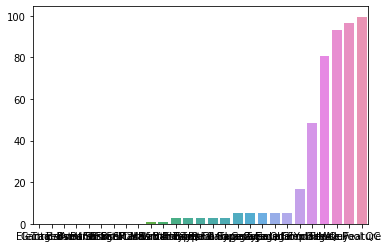

In [71]:
sns.barplot(x=percent_nan.index,y=percent_nan)


<AxesSubplot:>

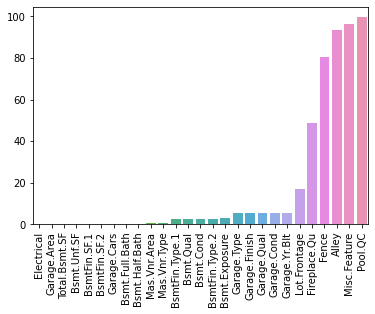

In [72]:
plt.xticks(rotation=90)#to rotate the graph
sns.barplot(x=percent_nan.index,y=percent_nan)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage.Area'),
  Text(2, 0, 'Total.Bsmt.SF'),
  Text(3, 0, 'Bsmt.Unf.SF'),
  Text(4, 0, 'BsmtFin.SF.1'),
  Text(5, 0, 'BsmtFin.SF.2'),
  Text(6, 0, 'Garage.Cars'),
  Text(7, 0, 'Bsmt.Full.Bath'),
  Text(8, 0, 'Bsmt.Half.Bath'),
  Text(9, 0, 'Mas.Vnr.Area'),
  Text(10, 0, 'Mas.Vnr.Type'),
  Text(11, 0, 'BsmtFin.Type.1'),
  Text(12, 0, 'Bsmt.Qual'),
  Text(13, 0, 'Bsmt.Cond'),
  Text(14, 0, 'BsmtFin.Type.2'),
  Text(15, 0, 'Bsmt.Exposure'),
  Text(16, 0, 'Garage.Type'),
  Text(17, 0, 'Garage.Finish'),
  Text(18, 0, 'Garage.Qual'),
  Text(19, 0, 'Garage.Cond'),
  Text(20, 0, 'Garage.Yr.Blt'),
  Text(21, 0, 'Lot.Frontage'),
  Text(22, 0, 'Fireplace.Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc.Feature'),
  Text(26, 0, 'Pool.QC')])

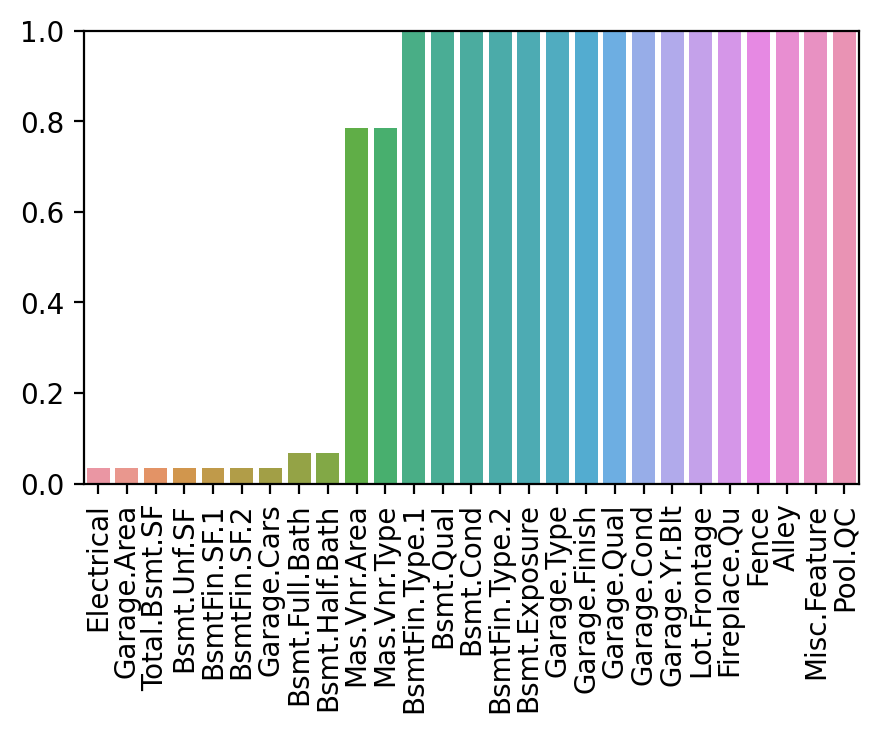

In [75]:
plt.figure(figsize=(5,3),dpi=200)
plt.ylim(0,1)# limit the graph o to 1 percent of data
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)#to rotate the graph

In [82]:
#if few rowa are missing then you can drop those rows and full columns is empty then you can drop it
#drop those values
percent_nan[percent_nan>1]#drop the percentage between 0 to 1 not permenant

BsmtFin.Type.1     2.733174
Bsmt.Qual          2.733174
Bsmt.Cond          2.733174
BsmtFin.Type.2     2.767339
Bsmt.Exposure      2.835668
Garage.Type        5.363854
Garage.Finish      5.432183
Garage.Qual        5.432183
Garage.Cond        5.432183
Garage.Yr.Blt      5.432183
Lot.Frontage      16.740690
Fireplace.Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc.Feature      96.412709
Pool.QC           99.590024
dtype: float64

In [78]:
#to check how many rows are empty

In [79]:
df[df['Electrical'].isnull()]

,Order,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1576,1578,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [81]:
df[df['Garage.Area'].isnull()]

,Order,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
2233,2237,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [85]:
# now drop permenantly
df=df.dropna(axis=0,subset=["Electrical","Garage.Area"])

In [87]:
#now run the function to find the missing values 
percent_nan=percent_missing(df)
percent_nan

Bsmt.Unf.SF        0.034188
Total.Bsmt.SF      0.034188
BsmtFin.SF.2       0.034188
BsmtFin.SF.1       0.034188
Bsmt.Full.Bath     0.068376
Bsmt.Half.Bath     0.068376
Mas.Vnr.Type       0.786325
Mas.Vnr.Area       0.786325
Bsmt.Qual          2.735043
Bsmt.Cond          2.735043
BsmtFin.Type.1     2.735043
BsmtFin.Type.2     2.769231
Bsmt.Exposure      2.837607
Garage.Type        5.367521
Garage.Qual        5.401709
Garage.Cond        5.401709
Garage.Finish      5.401709
Garage.Yr.Blt      5.401709
Lot.Frontage      16.752137
Fireplace.Qu      48.547009
Fence             80.478632
Alley             93.230769
Misc.Feature      96.410256
Pool.QC           99.589744
dtype: float64

In [95]:
percent_nan=percent_missing(df)
percent_nan

Mas.Vnr.Type       0.786325
Mas.Vnr.Area       0.786325
Bsmt.Qual          2.735043
Bsmt.Cond          2.735043
BsmtFin.Type.1     2.735043
BsmtFin.Type.2     2.769231
Bsmt.Exposure      2.837607
Garage.Type        5.367521
Garage.Cond        5.401709
Garage.Qual        5.401709
Garage.Finish      5.401709
Garage.Yr.Blt      5.401709
Lot.Frontage      16.752137
Fireplace.Qu      48.547009
Fence             80.478632
Alley             93.230769
Misc.Feature      96.410256
Pool.QC           99.589744
dtype: float64

In [97]:
#some time missing values are not error  it is like some feature that
#like in this case bsmtCond
# BSMT Numeric Columns - fillna "0"
bsmt_num_cols = ['BsmtFin.SF.1','BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF','Bsmt.Full.Bath', 'Bsmt.Half.Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0) #0 Imputation

#BSMT Ctegorical Columns - fill "None"
bsmt_str_cols = ['Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None') #None Imputation


In [98]:
percent_nan=percent_missing(df)
percent_nan

Mas.Vnr.Type      0.786325
Mas.Vnr.Area      0.786325
Garage.Type       5.367521
Garage.Yr.Blt     5.401709
Garage.Finish     5.401709
Garage.Qual       5.401709
Garage.Cond       5.401709
Lot.Frontage     16.752137
Fireplace.Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc.Feature     96.410256
Pool.QC          99.589744
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Mas.Vnr.Type'),
  Text(1, 0, 'Mas.Vnr.Area'),
  Text(2, 0, 'Garage.Type'),
  Text(3, 0, 'Garage.Yr.Blt'),
  Text(4, 0, 'Garage.Finish'),
  Text(5, 0, 'Garage.Qual'),
  Text(6, 0, 'Garage.Cond'),
  Text(7, 0, 'Lot.Frontage'),
  Text(8, 0, 'Fireplace.Qu'),
  Text(9, 0, 'Fence'),
  Text(10, 0, 'Alley'),
  Text(11, 0, 'Misc.Feature'),
  Text(12, 0, 'Pool.QC')])

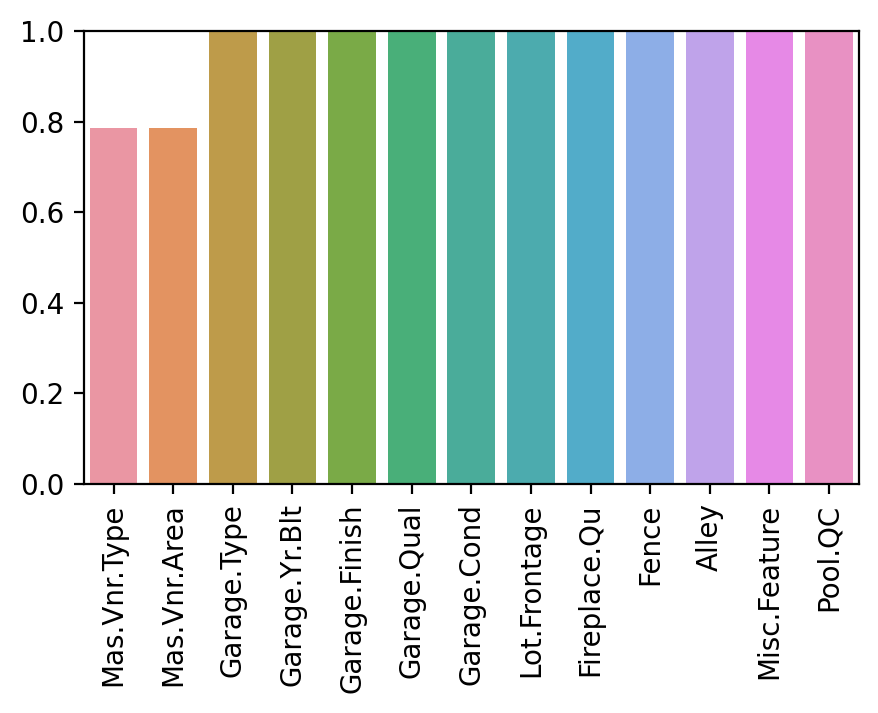

In [99]:
plt.figure(figsize=(5,3),dpi=200)
plt.ylim(0,1)# limit the graph o to 1 percent of data
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)#to rotate the graph